In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, complete, single, fcluster  
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
# Load Data
# Read the data from the csv file
df = pd.read_csv('cereals.csv')

df.head()

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,...,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,...,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,...,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,...,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,...,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,...,1.0,0.75,34.384843,1,0,0,0,0,1,0


In [9]:
# Task 0. We are going to develop clustering algorithms using the following variables: 'Calories', 'Protein',
# 'Fat', 'Fiber', 'Carbo', 'Sodium', 'Sugars', 'Potass', and 'Vitamins'. Drop any observations that have one or
# more missing value for these variables.

# Drop any observations that have one or more missing value for these variables.
df = df.dropna(subset=['Calories', 'Protein', 'Fat', 'Fiber', 'Carbo', 'Sodium', 'Sugars', 'Potass', 'Vitamins'])
df['Name'] = df['Name'].str.strip() 




In [16]:
# Task 1. First, perform agglomerative Clustering with complete linkage- Report the number of cereals in
# each cluster when the number of cluster is 2.

cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
cluster_labels = cluster.fit_predict(df[['Calories', 'Protein', 'Fat', 'Fiber', 'Carbo', 'Sodium', 'Sugars', 'Potass', 'Vitamins']])

unique, counts = np.unique(cluster_labels, return_counts=True) # return the number of cereals in each cluster

for cluster_num, counts in zip(unique, counts):
    print(f"Number of cereals in Cluster {cluster_num}: {counts}")





Number of cereals in Cluster 0: 60
Number of cereals in Cluster 1: 14


In [19]:
# Task 2. Then, use the same set of variables above to perform K-Mean Clustering with k=2. Report the
# number of cereals in each cluster.

cluster2 = KMeans(n_clusters=2, random_state=0)
cluster2_labels = cluster2.fit_predict(df[['Calories', 'Protein', 'Fat', 'Fiber', 'Carbo', 'Sodium', 'Sugars', 'Potass', 'Vitamins']])
unique, counts = np.unique(cluster2_labels, return_counts=True) # return the number of cereals in each cluster

for cluster_num, counts in zip(unique, counts):
    print(f"Number of cereals in Cluster {cluster_num}: {counts}")

#Describe cluster 0 and cluster 1

# Cluster 0

df[cluster2_labels == 0].describe()



c:\Users\seanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\seanc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cereals in Cluster 0: 57
Number of cereals in Cluster 1: 17


,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.0,57.0,57.000000,57.000000,57.000000,57.000000,57.0
mean,111.403509,2.473684,1.052632,198.947368,1.894737,15.245614,7.614035,94.035088,32.894737,2.210526,1.060526,0.831053,38.369144,1.0,0.0,0.070175,0.315789,0.385965,0.105263,0.0
std,14.812952,1.103651,0.832832,47.853355,1.877348,3.721466,3.944953,66.530327,23.221514,0.839576,0.136975,0.233419,9.970016,0.0,0.0,0.257713,0.468961,0.491150,0.309620,0.0
min,70.000000,1.000000,0.000000,125.000000,0.000000,7.000000,1.000000,25.000000,25.000000,1.000000,1.000000,0.250000,18.042851,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,100.000000,2.000000,0.000000,170.000000,0.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,30.450843,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
50%,110.000000,2.000000,1.000000,200.000000,1.500000,15.000000,8.000000,85.000000,25.000000,2.000000,1.000000,0.750000,39.241114,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
75%,120.000000,3.000000,2.000000,220.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,45.328074,1.0,0.0,0.000000,1.000000,1.000000,0.000000,0.0
max,160.000000,6.000000,3.000000,320.000000,9.000000,23.000000,14.000000,320.000000,100.000000,3.000000,1.500000,1.500000,59.642837,1.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [20]:
# Cluster 1
df[cluster2_labels == 1].describe()

,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.000000,17.000000
mean,92.352941,2.647059,0.823529,39.705882,3.117647,13.000000,5.411765,113.529412,16.176471,2.235294,0.931176,0.790000,55.792412,0.941176,0.294118,0.176471,0.294118,0.0,0.058824,0.058824
std,27.048432,0.996317,1.467791,49.889584,3.638034,4.062019,5.315765,84.368328,12.314805,0.831370,0.167402,0.247841,17.384248,0.242536,0.469668,0.392953,0.469668,0.0,0.242536,0.242536
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.330000,31.230054,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,80.000000,2.000000,0.000000,0.000000,1.000000,10.000000,0.000000,50.000000,0.000000,2.000000,1.000000,0.670000,37.136863,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,90.000000,3.000000,0.000000,15.000000,3.000000,13.000000,5.000000,100.000000,25.000000,2.000000,1.000000,0.880000,58.345141,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,110.000000,3.000000,1.000000,75.000000,3.000000,16.000000,8.000000,135.000000,25.000000,3.000000,1.000000,1.000000,68.235885,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000
max,150.000000,4.000000,5.000000,140.000000,14.000000,20.000000,15.000000,330.000000,25.000000,3.000000,1.000000,1.000000,93.704912,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


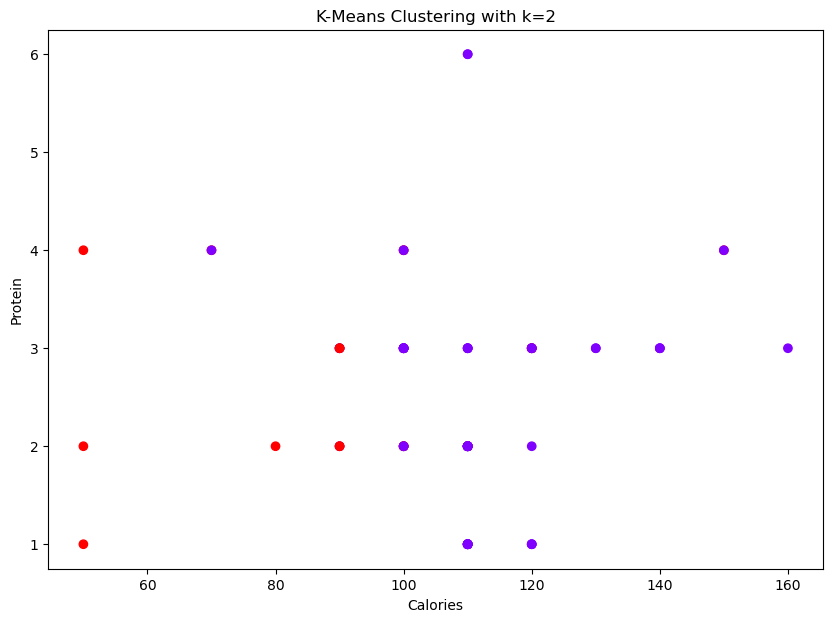

In [21]:
# visualize the clusters together with the original data
plt.figure(figsize=(10, 7))
plt.scatter(df['Calories'], df['Protein'], c=cluster2_labels, cmap='rainbow')
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('K-Means Clustering with k=2')
plt.show()

    